In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
import pandas as pd
import xml.etree.ElementTree as ET

In [ ]:
dis = pd.read_table('gene_disease_associations.tsv')
dis

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [ ]:
hemoglobin_db = dis.loc[dis['diseaseName'] == 'Hemoglobin F Disease']
hemoglobin_db

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
7016,790,CAD,0.482,0.846,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,1979.0,1979.0,1,0,CTD_human
14530,1723,DHODH,0.576,0.769,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,1979.0,1979.0,1,0,CTD_human
16930,2056,EPO,0.381,0.885,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,2005.0,2005.0,1,0,CTD_human
23733,3040,HBA2,0.512,0.808,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.36,1.000,1978.0,2019.0,1,0,CTD_human
23756,3043,HBB,0.494,0.808,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.60,0.962,1979.0,2017.0,7,0,CTD_human;ORPHANET
23783,3047,HBG1,0.615,0.538,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.40,0.978,1982.0,2019.0,2,0,ORPHANET
23790,3048,HBG2,0.565,0.692,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.40,1.000,1982.0,2019.0,3,0,ORPHANET
31204,3934,LCN2,0.405,0.885,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,2006.0,2006.0,1,0,CTD_human
51922,7036,TFR2,0.585,0.615,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,2006.0,2006.0,1,0,CTD_human
51940,7037,TFRC,0.437,0.885,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,1.000,2006.0,2006.0,1,0,CTD_human


In [ ]:
def make_df(data):
  index_list = list(data.index.values)
  df = pd.DataFrame(columns=['gene', 'start', 'end', 'gi_id', 'strand', 'chromosome'])
  for i, j in zip(data['geneId'].tolist(), index_list):
      symbol = data.at[j, 'geneSymbol']
      handle = Entrez.efetch(db="gene", id=f"{i}", rettype = 'xml')
      gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
      region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
      start = int(region.find("Seq-interval_from").text) + 1
      end = int(region.find("Seq-interval_to").text) + 1
      gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
      strand = region.find("Seq-interval_strand/Na-strand").get("value")
      handle_1 = Entrez.efetch(db="nucleotide", id=gi_id, rettype = 'gb')
      chromosome = SeqIO.read(handle_1, 'genbank')
      df.loc[len(df.index )] = [symbol, start, end, gi_id, strand, chromosome.id]
  df['length'] = (df['end']-df['start'])+1
  df.insert (loc= 0 , column='geneId', value=data['geneId'].tolist())
  return df


In [ ]:
df = make_df(hemoglobin_db)
df

,geneId,gene,start,end,gi_id,strand,chromosome,length
0,790,CAD,27217369,27243943,568815596,plus,NC_000002.12,26575
1,1723,DHODH,72008744,72027659,568815582,plus,NC_000016.10,18916
2,2056,EPO,100720468,100723700,568815591,plus,NC_000007.14,3233
3,3040,HBA2,172876,173710,568815582,plus,NC_000016.10,835
4,3043,HBB,5225464,5227071,568815587,minus,NC_000011.10,1608
5,3047,HBG1,5248269,5249857,568815587,minus,NC_000011.10,1589
6,3048,HBG2,5253188,5254781,568815587,minus,NC_000011.10,1594
7,3934,LCN2,128149453,128153453,568815589,plus,NC_000009.12,4001
8,7036,TFR2,100620420,100641552,568815591,minus,NC_000007.14,21133
9,7037,TFRC,196049284,196082090,568815595,minus,NC_000003.12,32807


In [ ]:
def add_rs(data):
  rslist = []
  for i in df['gene'].tolist():
    eShandle = Entrez.esearch(db="snp",
                              term=f'{i}[All Fields] AND pathogenic[Clinical_Significance] AND missense variant[Function_Class] AND (00000.0000[GLOBAL_MAF] : 00000.0100[GLOBAL_MAF])',
                              usehistory="y",
                              retmax=20)
    eSresult = Entrez.read(eShandle)
    rslist.append(eSresult['Count'])
  data['rs_num'] = rslist
  return data



In [ ]:
df = add_rs(df)

In [ ]:
df

,geneId,gene,start,end,gi_id,strand,chromosome,length,rs_num
0,790,CAD,27217369,27243943,568815596,plus,NC_000002.12,26575,0
1,1723,DHODH,72008744,72027659,568815582,plus,NC_000016.10,18916,1
2,2056,EPO,100720468,100723700,568815591,plus,NC_000007.14,3233,0
3,3040,HBA2,172876,173710,568815582,plus,NC_000016.10,835,1
4,3043,HBB,5225464,5227071,568815587,minus,NC_000011.10,1608,14
5,3047,HBG1,5248269,5249857,568815587,minus,NC_000011.10,1589,0
6,3048,HBG2,5253188,5254781,568815587,minus,NC_000011.10,1594,0
7,3934,LCN2,128149453,128153453,568815589,plus,NC_000009.12,4001,0
8,7036,TFR2,100620420,100641552,568815591,minus,NC_000007.14,21133,1
9,7037,TFRC,196049284,196082090,568815595,minus,NC_000003.12,32807,0


In [ ]:
#Функция для проверки наличия известной 3Д структуры белка в NCBI.
def structure(data):
  str_list = []
  for i in df['gene'].tolist():
    eShandle = Entrez.esearch(db="structure",
                              term=f'{i}')
    eSresult = Entrez.read(eShandle)
    if eSresult['Count'] == '0':
      str_list.append('no')
    else:
      str_list.append('yes')
  data['structure'] = str_list
  return data

In [ ]:
df = structure(df)
df

,geneId,gene,start,end,gi_id,strand,chromosome,length,rs_num,structure
0,790,CAD,27217369,27243943,568815596,plus,NC_000002.12,26575,0,yes
1,1723,DHODH,72008744,72027659,568815582,plus,NC_000016.10,18916,1,yes
2,2056,EPO,100720468,100723700,568815591,plus,NC_000007.14,3233,0,yes
3,3040,HBA2,172876,173710,568815582,plus,NC_000016.10,835,1,yes
4,3043,HBB,5225464,5227071,568815587,minus,NC_000011.10,1608,14,yes
5,3047,HBG1,5248269,5249857,568815587,minus,NC_000011.10,1589,0,yes
6,3048,HBG2,5253188,5254781,568815587,minus,NC_000011.10,1594,0,yes
7,3934,LCN2,128149453,128153453,568815589,plus,NC_000009.12,4001,0,yes
8,7036,TFR2,100620420,100641552,568815591,minus,NC_000007.14,21133,1,no
9,7037,TFRC,196049284,196082090,568815595,minus,NC_000003.12,32807,0,yes


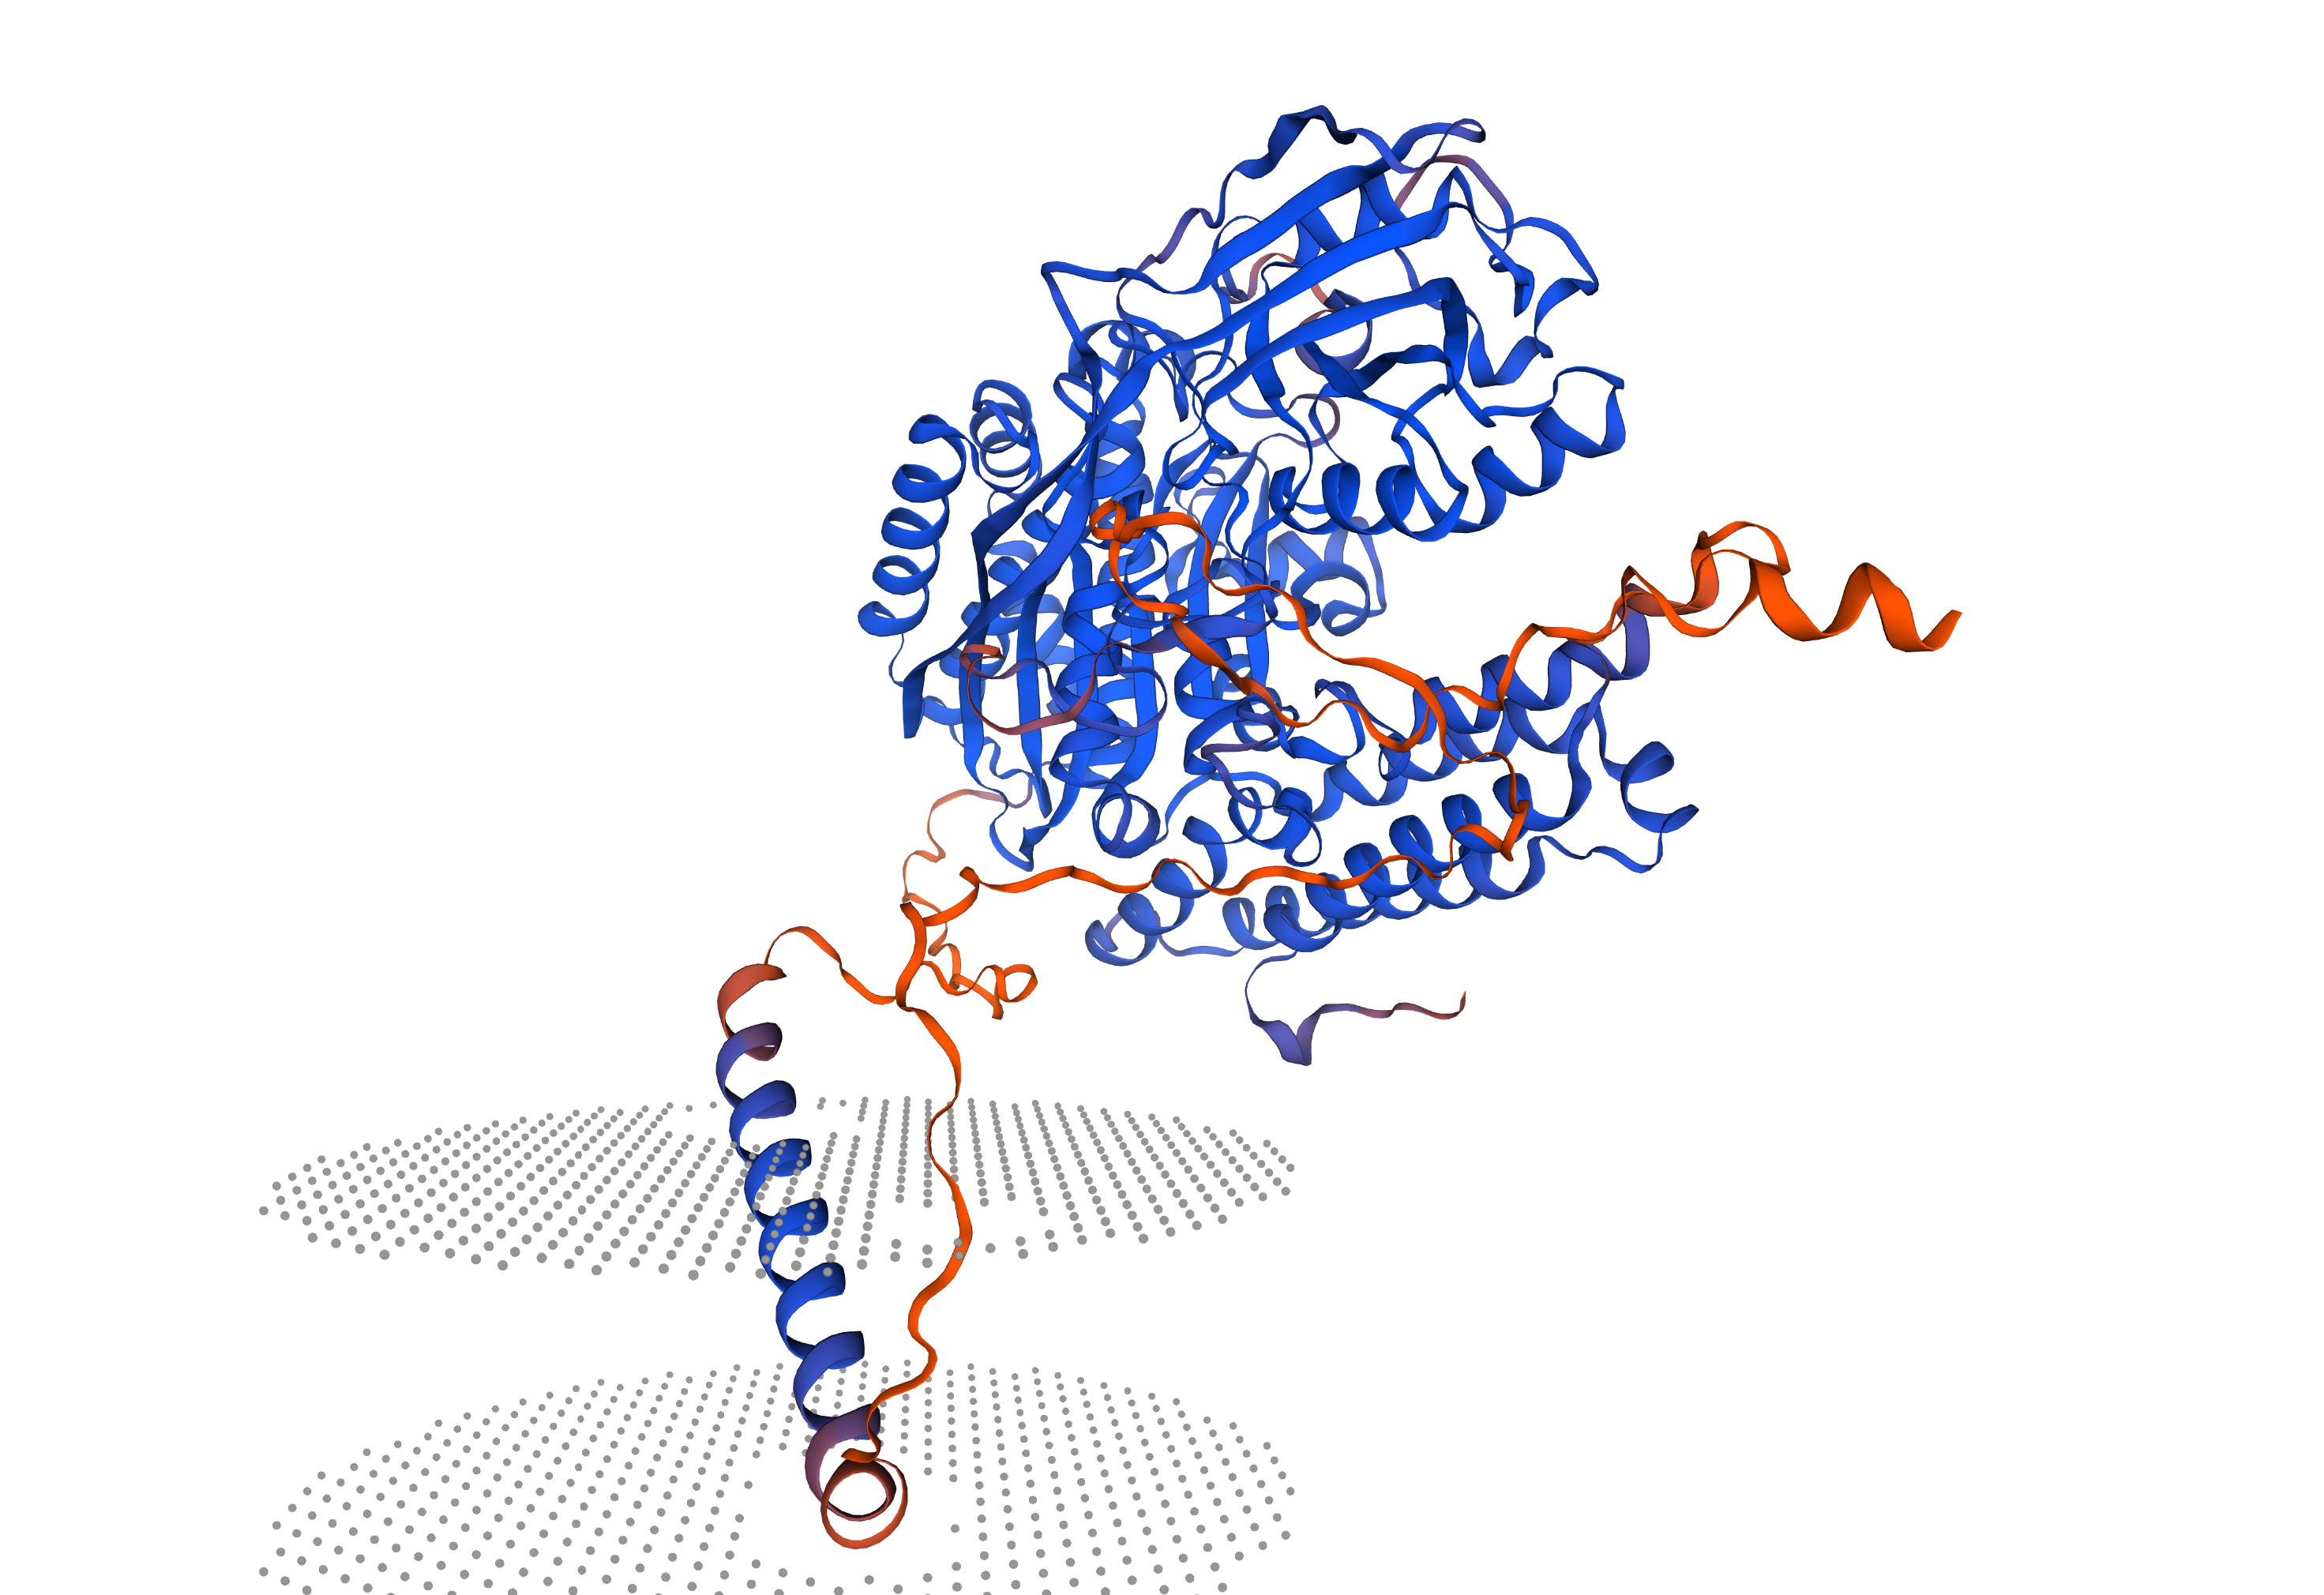

In [ ]:
# Построение 3д структуры белка с помощью AlphaFold
from IPython.display import Image, display
display(Image('/content/structure.png'))